In [1]:
# File location and type
file_location = "/FileStore/tables/medium_sparkify_event_data-9e3be.json"
file_type = "json"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
Martin Orford,Logged In,Joseph,M,20,Morales,597.55057,free,"Corpus Christi, TX",PUT,NextSong,1532063507000,292,Grand Designs,200,1538352011000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36""",293
John Brown's Body,Logged In,Sawyer,M,74,Larson,380.21179,free,"Houston-The Woodlands-Sugar Land, TX",PUT,NextSong,1538069638000,97,Bulls,200,1538352025000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",98
Afroman,Logged In,Maverick,M,184,Santiago,202.37016,paid,"Orlando-Kissimmee-Sanford, FL",PUT,NextSong,1535953455000,178,Because I Got High,200,1538352118000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",179
null,Logged In,Maverick,M,185,Santiago,null,paid,"Orlando-Kissimmee-Sanford, FL",PUT,Logout,1535953455000,178,null,307,1538352119000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36""",179
Lily Allen,Logged In,Gianna,F,22,Campos,194.53342,paid,"Mobile, AL",PUT,NextSong,1535931018000,245,Smile (Radio Edit),200,1538352124000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0,246
Carter USM,Logged In,Sofia,F,266,Gordon,138.29179,paid,"Rochester, MN",PUT,NextSong,1533175710000,162,Airplane Food,200,1538352125000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.94 Safari/537.36""",163
null,Logged Out,null,null,186,null,null,paid,null,GET,Home,null,178,null,200,1538352148000,null,
null,Logged Out,null,null,187,null,null,paid,null,GET,Home,null,178,null,200,1538352151000,null,
null,Logged Out,null,null,188,null,null,paid,null,GET,Home,null,178,null,200,1538352168000,null,
null,Logged Out,null,null,189,null,null,paid,null,PUT,Login,null,178,null,307,1538352169000,null,


In [2]:
# import libraries
from pyspark.sql.functions import add_months, avg, count, countDistinct, col, datediff,\
desc, expr, from_unixtime, floor, isnan, lag, lit, month, months_between,\
min, max, split, sum, udf, unix_timestamp, when, year
from pyspark.sql.types import IntegerType, DateType
from pyspark.sql.window import Window

from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, GBTClassifier, LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import sklearn as sk

from datetime import datetime

## Load and Clean Data

In [4]:
df.printSchema()

root
-- artist: string (nullable = true)
-- auth: string (nullable = true)
-- firstName: string (nullable = true)
-- gender: string (nullable = true)
-- itemInSession: long (nullable = true)
-- lastName: string (nullable = true)
-- length: double (nullable = true)
-- level: string (nullable = true)
-- location: string (nullable = true)
-- method: string (nullable = true)
-- page: string (nullable = true)
-- registration: long (nullable = true)
-- sessionId: long (nullable = true)
-- song: string (nullable = true)
-- status: long (nullable = true)
-- ts: long (nullable = true)
-- userAgent: string (nullable = true)
-- userId: string (nullable = true)

### Investigate timestamps

In [6]:
df.describe("ts").show()

+-------+--------------------+
summary| ts|
+-------+--------------------+
 count| 543705|
 mean|1.540964541209743...|
 stddev| 1.482057144912055E9|
 min| 1538352011000|
 max| 1543622466000|
+-------+--------------------+

In [7]:
ts = int(1538352011000)
ts /= 1000
print("Start Time: {}".format(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')))

ts = int(1543622466000)
ts /= 1000
print("End Time: {}".format(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')))

Start Time: 2018-10-01 00:00:11
End Time: 2018-12-01 00:01:06

### Investigate pages

In [9]:
df.select("page").dropDuplicates().show()

+--------------------+
 page|
+--------------------+
 Cancel|
 Submit Downgrade|
 Thumbs Down|
 Home|
 Downgrade|
 Roll Advert|
 Logout|
 Save Settings|
Cancellation Conf...|
 About|
 Submit Registration|
 Settings|
 Login|
 Register|
 Add to Playlist|
 Add Friend|
 NextSong|
 Thumbs Up|
 Help|
 Upgrade|
+--------------------+
only showing top 20 rows

## Investigate missing and null values

In [11]:
# check NaN values per column
# taken from: https://stackoverflow.com/questions/44627386/how-to-find-count-of-null-and-nan-values-for-each-column-in-a-pyspark-dataframe
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+----+------+---+---------+------+
artist|auth|firstName|gender|itemInSession|lastName|length|level|location|method|page|registration|sessionId|song|status| ts|userAgent|userId|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+----+------+---+---------+------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+----+------+---+---------+------+

In [12]:
# check null values per column
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+------+------+---+---------+------+
artist|auth|firstName|gender|itemInSession|lastName|length|level|location|method|page|registration|sessionId| song|status| ts|userAgent|userId|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+------+------+---+---------+------+
110828| 0| 15700| 15700| 0| 15700|110828| 0| 15700| 0| 0| 15700| 0|110828| 0| 0| 15700| 0|
+------+----+---------+------+-------------+--------+------+-----+--------+------+----+------------+---------+------+------+---+---------+------+

### Clean Data

In [14]:
# filter out all entries with missing names.
# they are not recording information that we will need for the model
df = df.filter(df.firstName.isNotNull())

In [15]:
# original timestamp in milliseconds, so divide by 1000
adjust_timestamp = udf(lambda x : x//1000, IntegerType())
df = df.withColumn("ts_adj", adjust_timestamp('ts'))

# convert adjusted timestamp to datetime
df = df.withColumn("datetime", from_unixtime(col("ts_adj")))

# convert registration timestamp to datetime
df = df.withColumn("reg_adj", adjust_timestamp('registration'))

# convert adjusted registration timestamp to datetime
df = df.withColumn("reg_datetime", from_unixtime(col("reg_adj")))

# drop all the timestamp columns. Will not need them
columns_to_drop = ['registration', 'ts', 'ts_adj', 'reg_adj']
df = df.drop(*columns_to_drop)

# add start date of analysis
df = df.withColumn('analysis_start_date', lit('2018-10-01 00:00:00'))

# number the months starting from the very first month of the analysis
df = df.withColumn("month_num", floor(months_between(df.datetime, df.analysis_start_date)))

In [16]:
# engineer free or paid binary variable
# free: 0, paid: 1
df = df.replace(["free", "paid"], ["0", "1"], "level")

# engineer male and female binary binary variable
# male: 0, female: 1
df = df.replace(["M", "F"], ["0", "1"], "gender")

## Define churn

In [18]:
def define_churn(x):
    """
    Defining churn as cancellation of service or downgrading from premium to free tier.
    """
    if x == "Cancellation Confirmation":
        return 1
    elif x == "Submit Downgrade":
        return 1
    else:
        return 0
    
churn_event = udf(lambda x : define_churn(x), IntegerType())
    
df = df.withColumn("churn", churn_event("page"))

In [19]:
# aggregate number of page visits for each user on a monthly basis

df_register = df.select('userId', 'month_num', 'page') \
.where(df.page=="Register") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numRegister')

df_cancel = df.select('userId', 'month_num', 'page') \
.where(df.page=="Cancel") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numCancelVisits')

df_upgrade = df.select('userId', 'month_num', 'page') \
.where(df.page=="Upgrade") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numUpgradeVisits')

df_downgrade = df.select('userId', 'month_num', 'page') \
.where(df.page=="Downgrade") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numDowngradeVisits')

df_home = df.select('userId', 'month_num', 'page') \
.where(df.page=="Home") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numHomeVisits')

df_about = df.select('userId', 'month_num', 'page') \
.where(df.page=="About") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numAboutVisits')

df_settings = df.select('userId', 'month_num', 'page') \
.where(df.page=="Settings") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numSettingsVisits')

df_saveSettings = df.select('userId', 'month_num', 'page') \
.where(df.page=="Save Settings") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numSaveSettings')

df_login = df.select('userId', 'month_num', 'page') \
.where(df.page=="Login") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numLogins')

df_logout = df.select('userId', 'month_num', 'page') \
.where(df.page=="Logout") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numLogouts')

df_addPlaylist = df.select('userId', 'month_num', 'page') \
.where(df.page=="Add to Playlist") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numAddPlaylists')

df_addFriend = df.select('userId', 'month_num', 'page') \
.where(df.page=="Add Friend") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numFriends')

df_thumbsUp = df.select('userId', 'month_num', 'page') \
.where(df.page=="Thumbs Up") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numThumbsUp')

df_thumbsDown = df.select('userId', 'month_num', 'page') \
.where(df.page=="Thumbs Down") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numThumbsDown')

df_advert = df.select('userId', 'month_num', 'page') \
.where(df.page=="Roll Advert") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numAdverts')

df_songsPlayed = df.select('userId', 'month_num', 'page') \
.where(df.page=="NextSong") \
.groupBy('userId', 'month_num') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'numSongsPlayed')

df_totalListen = df.select('userId', 'month_num', 'length') \
.groupBy('userId', 'month_num') \
.agg({'length':'sum'}) \
.withColumnRenamed('sum(length)', 'totalListenTime')

# number of songs per session
df_songsPerSession = df.select('userId', 'month_num', 'page', 'sessionId') \
.where(df.page=="NextSong") \
.groupBy('userId', 'month_num', 'sessionId') \
.agg({'page':'count'}) \
.withColumnRenamed('count(page)', 'SongsPerSession')
# avg number of songs per session
df_avgSongsPerSession = df_songsPerSession.groupBy('userId', 'month_num') \
.agg(avg(df_songsPerSession.SongsPerSession).alias('avgSongsPerSession'))

# number of singers
df_singersPlayed = df.select('userId', 'month_num', 'page', 'artist') \
.where(df.page=="NextSong") \
.groupBy('userId', 'month_num') \
.agg(countDistinct(df.artist).alias('numSingersPlayed'))

# number of singers per session
df_singersPerSession = df.select('userId', 'month_num', 'page', 'artist', 'sessionId') \
.where(df.page=="NextSong") \
.groupBy('userId', 'month_num', 'sessionId') \
.agg(countDistinct(df.artist).alias('SingersPerSession'))
# avg number of singers per session
df_avgSingersPerSession = df_singersPerSession.groupBy('userId', 'month_num') \
.agg(avg(df_singersPerSession.SingersPerSession).alias('avgSingersPerSession'))

# groupby user, month_num, sessionId.
df_userSession = df.groupBy("userId", "month_num", "sessionId") \
.agg(((max(unix_timestamp(df.datetime))-min(unix_timestamp(df.datetime)))/60.0).alias('sessionTimeMins'))
# Find avg session time
df_avgUserSession = df_userSession.groupBy('userId', 'month_num').agg(avg(df_userSession.sessionTimeMins).alias('avgSessionMins'))

# number of sessions
df_numSession = df.select('userId', 'month_num', 'sessionId').dropDuplicates() \
.groupby('userId', 'month_num').agg({'sessionId':'count'}) \
.withColumnRenamed('count(sessionId)', 'numSessions')

# if user had premium at any point of the month, assumer he/she has premium for
# the whole month for simplicity
df_level = df.select('userId', 'month_num', 'level') \
.groupBy('userId', 'month_num') \
.agg({'level':'max'}) \
.withColumnRenamed('max(level)', 'level')

# assuming nobody changes gender midway
df_gender = df.select('userId', 'month_num', 'gender') \
.groupBy('userId', 'month_num') \
.agg({'gender':'max'}) \
.withColumnRenamed('max(gender)', 'gender')

# start of each month
# from https://stackoverflow.com/questions/45612208/add-months-to-date-column-in-spark-dataframe
df = df.withColumn("start_of_month", expr("add_months(analysis_start_date, month_num)"))
# days since registration from start of each month
# from https://stackoverflow.com/questions/44020818/how-to-calculate-date-difference-in-pyspark
df = df.withColumn("daysSinceReg", datediff(df.start_of_month, df.reg_datetime))
#
df_daysReg = df.select('userId', 'month_num', 'daysSinceReg') \
.groupBy('userId', 'month_num') \
.agg(min(df.daysSinceReg).alias('daysSinceReg'))

df_churn = df.select('userId', 'month_num', 'churn') \
.groupBy('userId', 'month_num') \
.agg({'churn':'max'}) \
.withColumnRenamed('max(churn)', 'churn')

In [20]:
all_data = df_register.join(df_cancel, ['userId', 'month_num'], 'outer') \
.join(df_upgrade, ['userId', 'month_num'], 'outer') \
.join(df_downgrade, ['userId', 'month_num'], 'outer') \
.join(df_home, ['userId', 'month_num'], 'outer') \
.join(df_about, ['userId', 'month_num'], 'outer') \
.join(df_settings, ['userId', 'month_num'], 'outer') \
.join(df_saveSettings, ['userId', 'month_num'], 'outer') \
.join(df_login, ['userId', 'month_num'], 'outer') \
.join(df_logout, ['userId', 'month_num'], 'outer') \
.join(df_addPlaylist, ['userId', 'month_num'], 'outer') \
.join(df_addFriend, ['userId', 'month_num'], 'outer') \
.join(df_thumbsUp, ['userId', 'month_num'], 'outer') \
.join(df_thumbsDown, ['userId', 'month_num'], 'outer') \
.join(df_advert, ['userId', 'month_num'], 'outer') \
.join(df_songsPlayed, ['userId', 'month_num'], 'outer') \
.join(df_totalListen, ['userId', 'month_num'], 'outer') \
.join(df_avgSongsPerSession, ['userId', 'month_num'], 'outer') \
.join(df_singersPlayed, ['userId', 'month_num']) \
.join(df_avgSingersPerSession, ['userId', 'month_num'], 'outer') \
.join(df_avgUserSession, ['userId', 'month_num'], 'outer') \
.join(df_numSession, ['userId', 'month_num'], 'outer') \
.join(df_level, ['userId', 'month_num'], 'outer') \
.join(df_gender, ['userId', 'month_num'], 'outer') \
.join(df_daysReg, ['userId', 'month_num'], 'outer') \
.join(df_churn, ['userId', 'month_num'], 'outer')

In [21]:
windowlag = (Window.partitionBy('userId').orderBy('month_num'))

# generate 1 month lag features
all_data = all_data.withColumn('numRegister_lastMonth', lag(all_data['numRegister']).over(windowlag))
all_data = all_data.withColumn('numCancelVisits_lastMonth', lag(all_data['numCancelVisits']).over(windowlag))
all_data = all_data.withColumn('numUpgradeVisits_lastMonth', lag(all_data['numUpgradeVisits']).over(windowlag))
all_data = all_data.withColumn('numDowngradeVisits_lastMonth', lag(all_data['numDowngradeVisits']).over(windowlag))
all_data = all_data.withColumn('numHomeVisits_lastMonth', lag(all_data['numHomeVisits']).over(windowlag))
all_data = all_data.withColumn('numAboutVisits_lastMonth', lag(all_data['numAboutVisits']).over(windowlag))
all_data = all_data.withColumn('numSettingsVisits_lastMonth', lag(all_data['numSettingsVisits']).over(windowlag))
all_data = all_data.withColumn('numSaveSettings_lastMonth', lag(all_data['numSaveSettings']).over(windowlag))
all_data = all_data.withColumn('numLogins_lastMonth', lag(all_data['numLogins']).over(windowlag))
all_data = all_data.withColumn('numLogouts_lastMonth', lag(all_data['numLogouts']).over(windowlag))
all_data = all_data.withColumn('numAddPlaylists_lastMonth', lag(all_data['numAddPlaylists']).over(windowlag))
all_data = all_data.withColumn('numFriends_lastMonth', lag(all_data['numFriends']).over(windowlag))
all_data = all_data.withColumn('numThumbsUp_lastMonth', lag(all_data['numThumbsUp']).over(windowlag))
all_data = all_data.withColumn('numThumbsDown_lastMonth', lag(all_data['numThumbsDown']).over(windowlag))
all_data = all_data.withColumn('numAdverts_lastMonth', lag(all_data['numAdverts']).over(windowlag))
all_data = all_data.withColumn('numSongsPlayed_lastMonth', lag(all_data['numSongsPlayed']).over(windowlag))
all_data = all_data.withColumn('totalListenTime_lastMonth', lag(all_data['totalListenTime']).over(windowlag))
all_data = all_data.withColumn('avgSongsPerSession_lastMonth', lag(all_data['avgSongsPerSession']).over(windowlag))
all_data = all_data.withColumn('numSingersPlayed_lastMonth', lag(all_data['numSingersPlayed']).over(windowlag))
all_data = all_data.withColumn('avgSingersPerSession_lastMonth', lag(all_data['avgSingersPerSession']).over(windowlag))
all_data = all_data.withColumn('avgSessionMins_lastMonth', lag(all_data['avgSessionMins']).over(windowlag))
all_data = all_data.withColumn('numSessions_lastMonth', lag(all_data['numSessions']).over(windowlag))
all_data = all_data.withColumn('level_lastMonth', lag(all_data['level']).over(windowlag))

## Exploratory Data Analysis

In [23]:
# visualize 1 month lag values
all_data_pd = all_data \
.filter(all_data.month_num>=1) \
.select('numRegister_lastMonth','numCancelVisits_lastMonth',\
        'numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth',\
        'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth',\
        'numSettingsVisits_lastMonth', 'numSaveSettings_lastMonth',\
        'numLogins_lastMonth', 'numLogouts_lastMonth',\
        'numAddPlaylists_lastMonth', 'numFriends_lastMonth',\
        'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth',\
        'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',\
        'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth',\
        'numSingersPlayed_lastMonth', 'avgSingersPerSession_lastMonth',\
        'avgSessionMins_lastMonth', 'numSessions_lastMonth',\
        'level_lastMonth', 'gender', 'daysSinceReg', 'churn'
        ).toPandas()

all_data_pd.head()

Out[ 10 ]: 
 numRegister_lastMonth numCancelVisits_lastMonth numUpgradeVisits_lastMonth \
0 None None NaN 
1 None None NaN 
2 None None 3.0 
3 None None 2.0 
4 None None NaN 

 numDowngradeVisits_lastMonth numHomeVisits_lastMonth \
0 NaN 1.0 
1 9.0 43.0 
2 NaN 22.0 
3 NaN 1.0 
4 3.0 18.0 

 numAboutVisits_lastMonth numSettingsVisits_lastMonth \
0 NaN 3.0 
1 1.0 12.0 
2 1.0 3.0 
3 NaN 1.0 
4 2.0 NaN 

 numSaveSettings_lastMonth numLogins_lastMonth numLogouts_lastMonth ... \
0 NaN None NaN ... 
1 3.0 None 11.0 ... 
2 1.0 None 7.0 ... 
3 NaN None NaN ... 
4 NaN None 6.0 ... 

 totalListenTime_lastMonth avgSongsPerSession_lastMonth \
0 14632.72472 29.000000 
1 293905.64972 130.222222 
2 58918.29257 26.333333 
3 9965.43446 10.250000 
4 87588.04928 115.000000 

 numSingersPlayed_lastMonth avgSingersPerSession_lastMonth \
0 57.0 28.500000 
1 858.0 117.333333 
2 224.0 26.000000 
3 41.0 10.250000 
4 309.0 109.333333 

 avgSessionMins_lastMonth numSessions_lastMonth level_lastMonth gender \
0 118.066667 2.0 0 0 
1 487.268333 10.0 1 1 
2 107.729630 9.0 0 0 
3 37.387500 4.0 0 0 
4 483.300000 3.0 1 1 

 daysSinceReg churn 
0 92 0 
1 102 1 
2 51 0 
3 50 0 
4 32 0 

[5 rows x 26 columns]

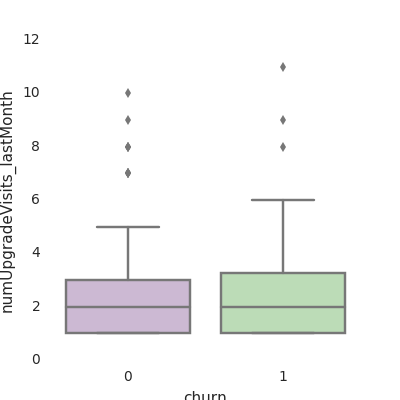

In [24]:
fig, ax = plt.subplots(figsize=(4,4));
ax = sns.boxplot(x="churn", y="numUpgradeVisits_lastMonth", data=all_data_pd, palette="PRGn");
display(fig)

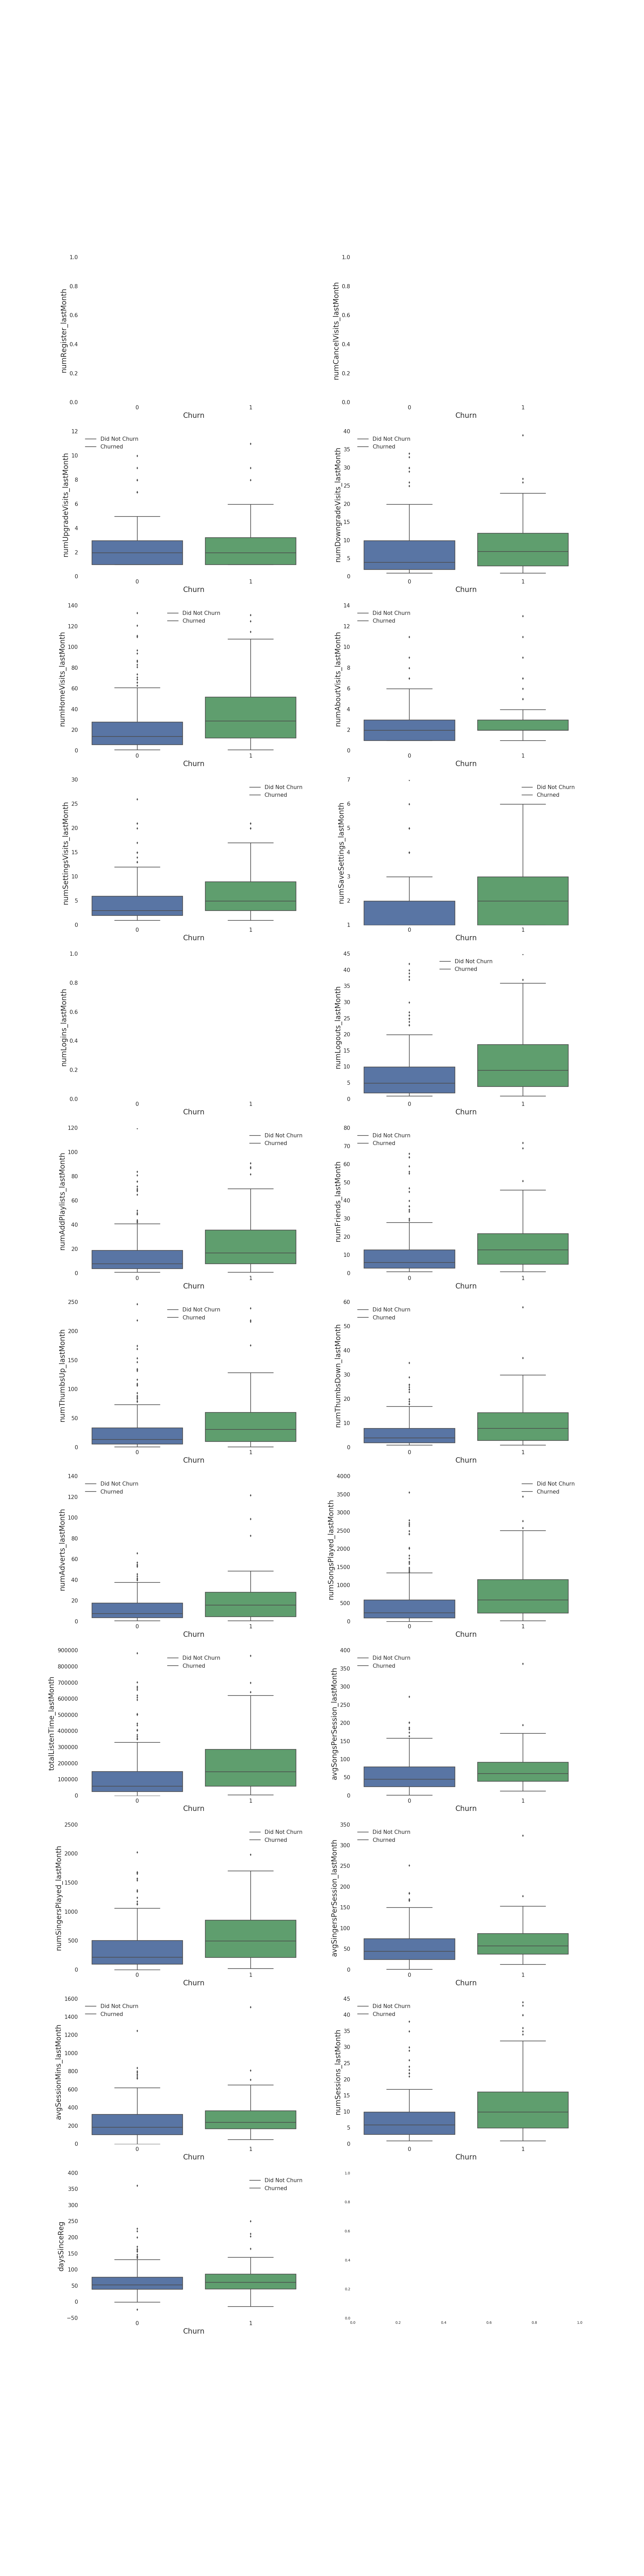

In [25]:
features = all_data_pd.drop(['level_lastMonth', 'gender', 'churn'], axis=1).columns

num_rows = math.ceil(len(features)/2)
fig, ax = plt.subplots(num_rows, 2, figsize = (25,100))
feat_num = 0
for row_i in range(num_rows):
  left_feat = features[feat_num]
  sns.boxplot(x="churn", y=left_feat, data=all_data_pd, palette="deep", ax=ax[row_i,0]);
  ax[row_i,0].set_xlabel("Churn", fontsize=20)
  ax[row_i,0].set_ylabel(left_feat, fontsize=20)
  ax[row_i,0].xaxis.set_tick_params(labelsize=15)
  ax[row_i,0].yaxis.set_tick_params(labelsize=15)
  ax[row_i,0].legend(["Did Not Churn", "Churned"], loc=0, fontsize=15)
  feat_num += 1
  if feat_num < len(features):
    right_feat = features[feat_num]
    feat_num += 1
    sns.boxplot(x="churn", y=right_feat, data=all_data_pd, palette="deep", ax=ax[row_i,1]);
    ax[row_i,1].set_xlabel("Churn", fontsize=20)
    ax[row_i,1].set_ylabel(right_feat, fontsize=20)
    ax[row_i,1].xaxis.set_tick_params(labelsize=15)
    ax[row_i,1].yaxis.set_tick_params(labelsize=15)
    ax[row_i,1].legend(["Did Not Churn", "Churned"], loc=0, fontsize=15)

display(fig)

In [26]:
all_data_pd.groupby(['churn', 'level_lastMonth']).agg({'level_lastMonth':'count'}).unstack()

Out[ 52 ]: 
 level_lastMonth 
level_lastMonth 0 1
churn 
0 119 158
1 13 79

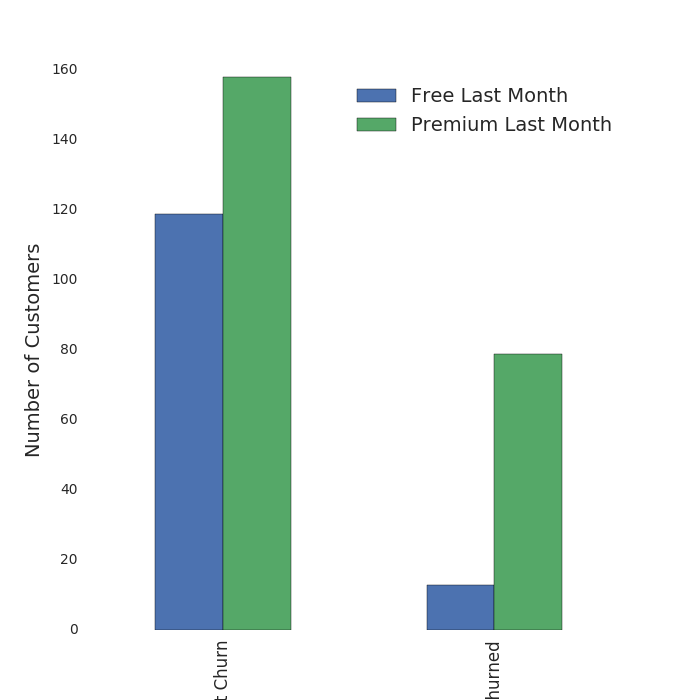

In [27]:
fig, ax = plt.subplots(figsize=(7,7))
all_data_pd.groupby(['churn', 'level_lastMonth']).agg({'level_lastMonth':'count'}).unstack().plot.bar(ax=ax);
ax.legend(["Free Last Month", "Premium Last Month"], fontsize=14);
ax.set_xticklabels(["Did Not Churn","Churned"], fontsize=12);
ax.set_ylabel("Number of Customers", fontsize=14);
display(fig)

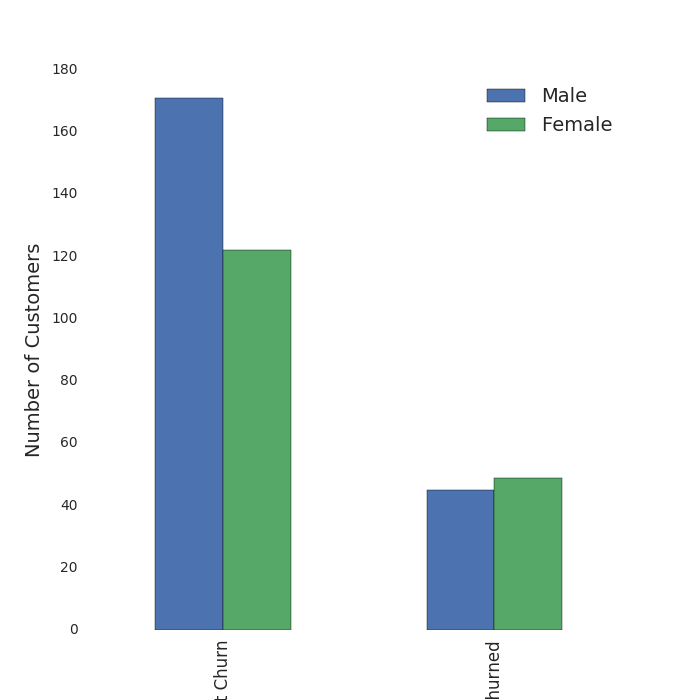

In [28]:
fig, ax = plt.subplots(figsize=(7,7))
all_data_pd.groupby(['churn', 'gender']).agg({'gender':'count'}).unstack().plot.bar(ax=ax);
ax.legend(["Male", "Female"], fontsize=14);
ax.set_xticklabels(["Did Not Churn","Churned"], fontsize=12);
ax.set_ylabel("Number of Customers", fontsize=14);
display(fig)

## Additional Data Adjustments

In [30]:
# convert userId, gender, level, level_lastMonth to numeric
convert_numeric = ['userId', 'level', 'gender', 'level_lastMonth']
for feat in convert_numeric:
    featName = feat + "_n"
    all_data = all_data.withColumn(featName, all_data[feat].cast("float"))
    all_data = all_data.drop(feat)
    
# fill na/null values with 0
all_data = all_data.na.fill(0.0)

In [31]:
all_data.persist()

Out[ 11 ]: DataFrame[month_num: bigint, numRegister: bigint, numCancelVisits: bigint, numUpgradeVisits: bigint, numDowngradeVisits: bigint, numHomeVisits: bigint, numAboutVisits: bigint, numSettingsVisits: bigint, numSaveSettings: bigint, numLogins: bigint, numLogouts: bigint, numAddPlaylists: bigint, numFriends: bigint, numThumbsUp: bigint, numThumbsDown: bigint, numAdverts: bigint, numSongsPlayed: bigint, totalListenTime: double, avgSongsPerSession: double, numSingersPlayed: bigint, avgSingersPerSession: double, avgSessionMins: double, numSessions: bigint, daysSinceReg: int, churn: int, numRegister_lastMonth: bigint, numCancelVisits_lastMonth: bigint, numUpgradeVisits_lastMonth: bigint, numDowngradeVisits_lastMonth: bigint, numHomeVisits_lastMonth: bigint, numAboutVisits_lastMonth: bigint, numSettingsVisits_lastMonth: bigint, numSaveSettings_lastMonth: bigint, numLogins_lastMonth: bigint, numLogouts_lastMonth: bigint, numAddPlaylists_lastMonth: bigint, numFriends_lastMonth: bigint, numThumbsUp_lastMonth: bigint, numThumbsDown_lastMonth: bigint, numAdverts_lastMonth: bigint, numSongsPlayed_lastMonth: bigint, totalListenTime_lastMonth: double, avgSongsPerSession_lastMonth: double, numSingersPlayed_lastMonth: bigint, avgSingersPerSession_lastMonth: double, avgSessionMins_lastMonth: double, numSessions_lastMonth: bigint, userId_n: float, level_n: float, gender_n: float, level_lastMonth_n: float]

## Modelling

In [33]:
all_data.columns

Out[ 12 ]: 
['month_num',
 'numRegister',
 'numCancelVisits',
 'numUpgradeVisits',
 'numDowngradeVisits',
 'numHomeVisits',
 'numAboutVisits',
 'numSettingsVisits',
 'numSaveSettings',
 'numLogins',
 'numLogouts',
 'numAddPlaylists',
 'numFriends',
 'numThumbsUp',
 'numThumbsDown',
 'numAdverts',
 'numSongsPlayed',
 'totalListenTime',
 'avgSongsPerSession',
 'numSingersPlayed',
 'avgSingersPerSession',
 'avgSessionMins',
 'numSessions',
 'daysSinceReg',
 'churn',
 'numRegister_lastMonth',
 'numCancelVisits_lastMonth',
 'numUpgradeVisits_lastMonth',
 'numDowngradeVisits_lastMonth',
 'numHomeVisits_lastMonth',
 'numAboutVisits_lastMonth',
 'numSettingsVisits_lastMonth',
 'numSaveSettings_lastMonth',
 'numLogins_lastMonth',
 'numLogouts_lastMonth',
 'numAddPlaylists_lastMonth',
 'numFriends_lastMonth',
 'numThumbsUp_lastMonth',
 'numThumbsDown_lastMonth',
 'numAdverts_lastMonth',
 'numSongsPlayed_lastMonth',
 'totalListenTime_lastMonth',
 'avgSongsPerSession_lastMonth',
 'numSingersPlayed_lastMonth',
 'avgSingersPerSession_lastMonth',
 'avgSessionMins_lastMonth',
 'numSessions_lastMonth',
 'userId_n',
 'level_n',
 'gender_n',
 'level_lastMonth_n']

In [34]:
model_data = all_data \
.filter(all_data.month_num>0) \
.select('userId_n', 'month_num',\
        'numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth',\
        'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth',\
        'numSettingsVisits_lastMonth', 'numSaveSettings_lastMonth',\
        'numLogouts_lastMonth', \
        'numAddPlaylists_lastMonth', 'numFriends_lastMonth',\
        'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth',\
        'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',\
        'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth',\
        'numSingersPlayed_lastMonth', 'avgSingersPerSession_lastMonth',\
        'avgSessionMins_lastMonth', 'numSessions_lastMonth',\
        'level_lastMonth_n',\
        'gender_n', 'daysSinceReg', 'churn'
        ).withColumnRenamed('churn', 'label')

In [35]:
# will be using train test split since we are predicting churn for a single month
train,test = model_data.randomSplit([0.8, 0.2], seed=50)

In [36]:
inputColumns = ['userId_n', 'month_num',\
                'numUpgradeVisits_lastMonth', 'numDowngradeVisits_lastMonth',\
                'numHomeVisits_lastMonth', 'numAboutVisits_lastMonth',\
                'numSettingsVisits_lastMonth', 'numSaveSettings_lastMonth',\
                'numLogouts_lastMonth', \
                'numAddPlaylists_lastMonth', 'numFriends_lastMonth',\
                'numThumbsUp_lastMonth', 'numThumbsDown_lastMonth',\
                'numAdverts_lastMonth', 'numSongsPlayed_lastMonth',\
                'totalListenTime_lastMonth', 'avgSongsPerSession_lastMonth',\
                'numSingersPlayed_lastMonth', 'avgSingersPerSession_lastMonth',\
                'avgSessionMins_lastMonth', 'numSessions_lastMonth',\
                'level_lastMonth_n', 'gender_n', 'daysSinceReg']


assembler = VectorAssembler(inputCols=inputColumns, outputCol="FeaturesVec")

scaler = StandardScaler(inputCol="FeaturesVec", outputCol="features", withMean=True, withStd=True)

# set max_iter to 15 to reduce computation time

# Logistic Regression
lr=LogisticRegression(maxIter=15)
pipeline_lr = Pipeline(stages=[assembler, scaler, lr])

# Support Vector Machine Classifier
svc = LinearSVC(maxIter=15)
pipeline_svc = Pipeline(stages=[assembler, scaler, svc])

# Gradient Boosted Trees
gbt = GBTClassifier(maxIter=10, minInstancesPerNode=5, maxDepth=7, seed=42)
pipeline_gbt = Pipeline(stages=[assembler, scaler, gbt])

In [37]:
def evaluate_model(results):
    """ Prints the confusion matrix """
    tn = results.filter((results.prediction == 0)&(results.label==0)).count() * 1.0 # true negative
    fp = results.filter((results.prediction == 1)&(results.label==0)).count() * 1.0 # false positive
    fn = results.filter((results.prediction == 0)&(results.label==1)).count() * 1.0 # false negative
    tp = results.filter((results.prediction == 1)&(results.label==1)).count() * 1.0 # true positive
    print("Confusion Matrix")
    print("TN:{} | FP:{}".format(tn,fp))
    print("FN:{} | TP: {}".format(fn, tp))
    print("--------------")
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    #print(precision)
    #print(recall)
    f1 = 2.0 * (precision * recall)/(precision + recall)
    print("F1-Score: {}".format(f1))
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print("Accuracy: {}".format(accuracy))

### Logistic Regression

In [39]:
# logistic Regression
# Using default L2 regularization
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam,[0.0, 0.05, 0.1]) \
    .build()

cv_lr = CrossValidator(estimator=pipeline_lr,\
                       estimatorParamMaps=paramGrid,\
                       evaluator=BinaryClassificationEvaluator(metricName="areaUnderPR"),\
                       numFolds=5,\
                       seed=42
                      )
cvModel_lr = cv_lr.fit(train)

In [40]:
lr_results = cvModel_lr.transform(test)

In [41]:
evaluate_model(lr_results)

Confusion Matrix
TN:49.0 | FP:8.0
FN:17.0 | TP: 2.0
--------------
F1-Score: 0.137931034483
Precision: 0.2
Recall: 0.105263157895
Accuracy: 0.671052631579

In [42]:
params = [{p.name: v for p, v in m.items()} for m in cvModel_lr.getEstimatorParamMaps()]
for ps, metric in zip(params, cvModel_lr.avgMetrics):
    print("Reg Param: {} ... areaUnderPR: {}".format(ps['regParam'], metric))

Reg Param: 0.0 ... areaUnderPR: 0.449369518081
Reg Param: 0.05 ... areaUnderPR: 0.439019058358
Reg Param: 0.1 ... areaUnderPR: 0.441607036382

In [43]:
# this is wrong, proof in next cell.
# It treats labels 0 and 1 as seperate classes
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
print("Logistic Regression Model --- F1-Score is: ")
print(evaluator.evaluate(lr_results, {evaluator.metricName: "f1"}))

Logistic Regression Model --- F1-Score is: 
0.63204373423

In [44]:
TN = 49.0
FP = 8.0
FN = 17.0
TP = 2.0

precision_1 = TP/(TP+FP)
recall_1 = TP/(TP+FN)
f1_1 = 2 * (precision_1 * recall_1)/(precision_1 + recall_1)
weight_1 = (TP + FN)/(TP+FP+FN+TP)

precision_2 = TN/(TN+FN)
recall_2 = TN/(TN+FP)
f1_2 = 2 * (precision_2 * recall_2)/(precision_2 + recall_2)
weight_2 = (TN + FP)/(TP+FP+FN+TP)

multi_f1 = (weight_1 * f1_1 + weight_2 * f1_2)/(weight_1 + weight_2)
print(multi_f1)

0.63204373423

### Linear SVC

In [46]:
# Linear Support Vector Machine
# Using L2 regularization
paramGrid = ParamGridBuilder() \
    .addGrid(svc.regParam,[0.0, 0.05, 0.1]) \
    .build()

cv_svc = CrossValidator(estimator=pipeline_svc,\
                       estimatorParamMaps=paramGrid,\
                       evaluator=BinaryClassificationEvaluator(metricName="areaUnderPR"),\
                       numFolds=5,\
                       seed=42
                      )
cvModel_svc = cv_svc.fit(train)

In [47]:
svc_results = cvModel_svc.transform(test)
evaluate_model(svc_results)

Confusion Matrix
TN:56.0 | FP:1.0
FN:18.0 | TP: 1.0
--------------
F1-Score: 0.0952380952381
Precision: 0.5
Recall: 0.0526315789474
Accuracy: 0.75

In [48]:
params = [{p.name: v for p, v in m.items()} for m in cvModel_svc.getEstimatorParamMaps()]
for ps, metric in zip(params, cvModel_svc.avgMetrics):
    print("Reg Param: {} ... areaUnderPR: {}".format(ps['regParam'], metric))

Reg Param: 0.0 ... areaUnderPR: 0.429981305225
Reg Param: 0.05 ... areaUnderPR: 0.422266345865
Reg Param: 0.1 ... areaUnderPR: 0.416558229938

### Gradient Boosted Trees

In [50]:
# Gradient Boosted Trees
paramGrid = ParamGridBuilder() \
            .addGrid(gbt.subsamplingRate,[0.75, 1.0])\
            .build()

cv_gbt = CrossValidator(estimator=pipeline_gbt,\
                        estimatorParamMaps=paramGrid,\
                        evaluator=BinaryClassificationEvaluator(metricName="areaUnderPR"),\
                        numFolds=5,\
                        seed=42
                       )
cvModel_gbt = cv_gbt.fit(train)

In [51]:
gbt_results = cvModel_gbt.transform(test)
evaluate_model(gbt_results)

Confusion Matrix
TN:47.0 | FP:10.0
FN:11.0 | TP: 8.0
--------------
F1-Score: 0.43243243243243246
Precision: 0.4444444444444444
Recall: 0.42105263157894735
Accuracy: 0.7236842105263158

In [52]:
params = [{p.name: v for p, v in m.items()} for m in cvModel_gbt.getEstimatorParamMaps()]
for ps, metric in zip(params, cvModel_gbt.avgMetrics):
    #print("minInstancesPerNode:{} ... subsamplingRate:{} ... maxDepth:{} ... F1: {}".format(ps['minInstancesPerNode'], ps['subsamplingRate'], ps['maxDepth'], metric))
    print("subsamplingRate: {} ... areaUnderPR: {}".format(ps['subsamplingRate'], metric))

subsamplingRate: 0.75 ... areaUnderPR: 0.43949298933259906
subsamplingRate: 1.0 ... areaUnderPR: 0.39902335974905423

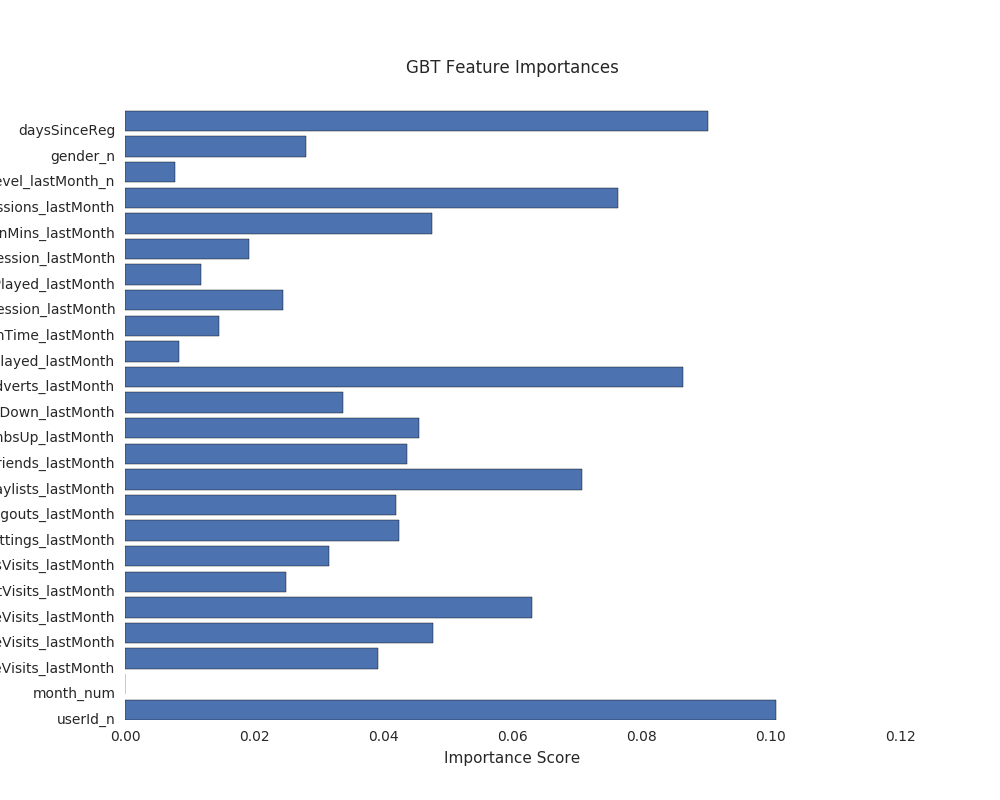

In [53]:
importances = cvModel_gbt.bestModel.stages[-1].featureImportances.toArray()

y_pos = np.arange(len(inputColumns))
    
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(y_pos, importances);
plt.yticks(y_pos, inputColumns);
plt.xlabel('Importance Score');
plt.title('GBT Feature Importances');
display(fig)

In [54]:
importances = cvModel_gbt.bestModel.stages[-1].featureImportances.toArray()

print("Features | Importance")
for i in range(len(inputColumns)):
    print("{} | {}".format(inputColumns[i], importances[i]))

Features | Importance
userId_n | 0.10079402873557247
month_num | 0.0
numUpgradeVisits_lastMonth | 0.0391445953704523
numDowngradeVisits_lastMonth | 0.04761702307305857
numHomeVisits_lastMonth | 0.06307605285805712
numAboutVisits_lastMonth | 0.02493624533309627
numSettingsVisits_lastMonth | 0.03151831192696648
numSaveSettings_lastMonth | 0.04249898621808702
numLogouts_lastMonth | 0.04198608637784549
numAddPlaylists_lastMonth | 0.07076244381258219
numFriends_lastMonth | 0.04362833455242482
numThumbsUp_lastMonth | 0.045542502141814545
numThumbsDown_lastMonth | 0.03377661375117751
numAdverts_lastMonth | 0.08641902756919939
numSongsPlayed_lastMonth | 0.008438140795898384
totalListenTime_lastMonth | 0.01455329300483747
avgSongsPerSession_lastMonth | 0.02447272810304152
numSingersPlayed_lastMonth | 0.01179456185303581
avgSingersPerSession_lastMonth | 0.019144087750070135
avgSessionMins_lastMonth | 0.04759381761867791
numSessions_lastMonth | 0.07631170544734583
level_lastMonth_n | 0.007667149664885105
gender_n | 0.028089374154290327
daysSinceReg | 0.09023488988758313